In [25]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df_nex_vor = pd.read_csv('data/TB_nex_vor.csv', parse_dates=['Date'])
df_gmdr_vor = pd.read_csv('data/TB_gmdr_vor.csv', parse_dates=['Date'])
df_wtgn_vor = pd.read_csv('data/TB_wtgn_vor.csv', parse_dates=['Date'])

In [27]:
df_vor = pd.concat([df_nex_vor, 
                    df_gmdr_vor, 
                    df_wtgn_vor], axis=0)

In [28]:
# remove spaces from column names
for c in df_vor.columns:
    if ' ' in c:
        df_vor.rename(columns={c: re.sub(' ', '_', c)}, inplace=True)

<AxesSubplot:ylabel='Frequency'>

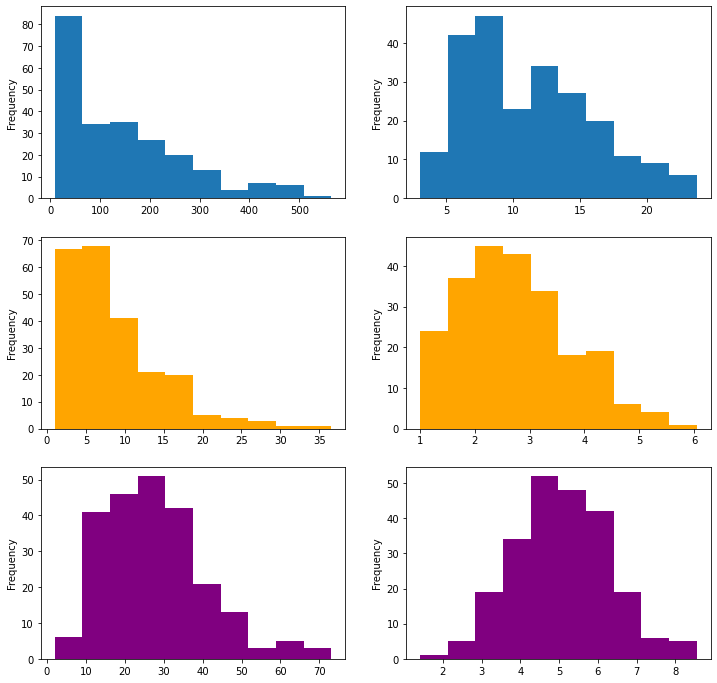

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12))
df_vor['Total_Weight_(g/m^2)'].plot.hist(ax=ax[0, 0])
df_vor['Total_Weight_(g/m^2)'].transform(lambda x: np.power(x, 0.5)).plot.hist(ax=ax[0, 1])

df_vor['Low_cm'].plot.hist(ax=ax[1, 0], color='orange')
df_vor['Low_cm'].transform(lambda x: np.power(x, 0.5)).plot.hist(ax=ax[1, 1], color='orange')

df_vor['High_cm'].plot.hist(ax=ax[2, 0], color='purple')
df_vor['High_cm'].transform(lambda x: np.power(x, 0.5)).plot.hist(ax=ax[2, 1], color='purple')
#df_vor['Total_Weight_(g/m^2)'].transform(lambda x: np.log(x)).plot.hist(ax=ax[1])

In [30]:
mod_both = smf.ols("Q('Total_Weight_(g/m^2)') ~ Low_cm + High_cm", 
                   data=df_vor).fit()

In [31]:
mod_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('Total_Weight_(g/m^2)')   R-squared:                       0.597
Model:                                   OLS   Adj. R-squared:                  0.593
Method:                        Least Squares   F-statistic:                     168.6
Date:                       Wed, 20 Apr 2022   Prob (F-statistic):           1.12e-45
Time:                               09:49:08   Log-Likelihood:                -1330.9
No. Observations:                        231   AIC:                             2668.
Df Residuals:                            228   BIC:                             2678.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2318     12.386     -0.342      0.733     -28.637      20.174
Low_cm        11.8352      1.371      8.632      0.000       9.133      14.537
High_cm        1.8628      0.659      2.825      0.005       0.564       3.162
==============================================================================
Omnibus:                       24.663   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.303
Skew:                           0.539   Prob(JB):                     1.97e-11
Kurtosis:                       4.990   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1


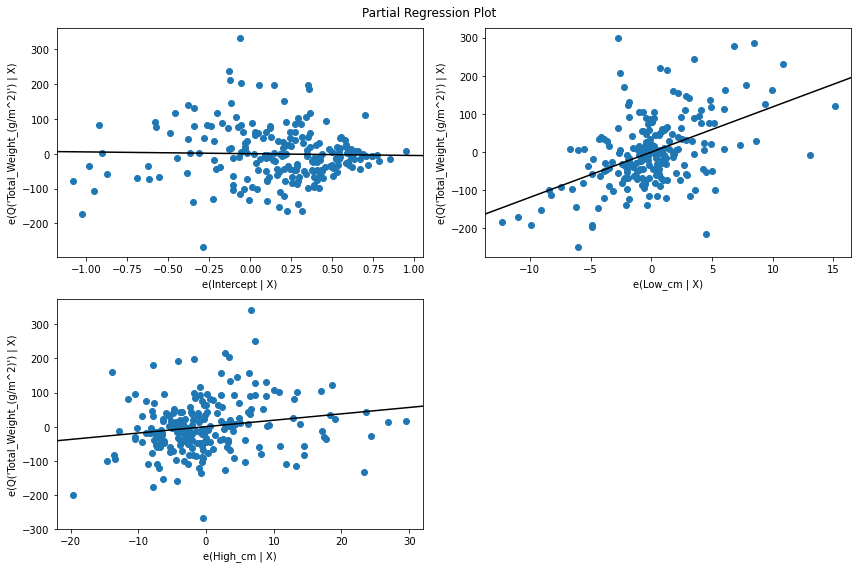

In [23]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(mod_both, fig=fig)
fig.tight_layout(pad=1.0)

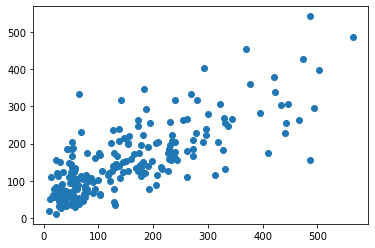

In [24]:
plt.scatter(df_vor['Total_Weight_(g/m^2)'], mod_both.predict())

### other data
* there is VOR+clipping data from weight gain project, not ready yet (2019 might be ready, not sure about VOR, Elle is weighing 2020 data) - will prioritize 2019/2020 VOR
    * this will be the best VOR/Clipping data
    * 2019 - much of the VOR data won't be usable (but clipping is ok!). Lauren needs to figure out when date cut-off is for fix.
* Courtenay's bird habitat project has a ton of VOR data (30 m transects, since 2015) - can talk with David about this.
    * Clipping done a month later about 8 m away at subset of locations(60-80 locs)
* some other projects from 2014/2015 that Lauren can access
    * This would be nice to expand spatial coverage and burns
* USFS project in 2015/2016 - grid sampliing
    * not sure of their protocol (observations may be too limited)
    * data might be hard to access (a lot of people no longer there)

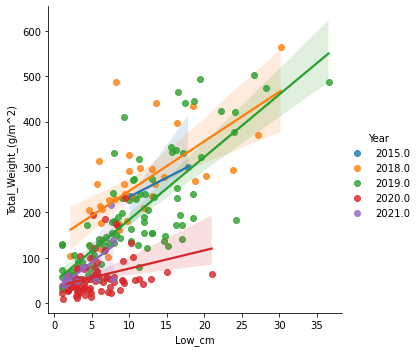

In [34]:
sns.lmplot(x='Low_cm',
           y='Total_Weight_(g/m^2)',
           data=df_vor,
           hue='Year')